In [1]:
import pandas as pd
import numpy as np
from scipy import integrate, linalg
import matplotlib.pyplot as plt

### Pandas

Загрузить данные и проанализировать их (используя функции .info и .describe)

In [2]:
data = pd.read_csv('TopAnimatedImDb.csv')
data.head()

,Title,Rating,Votes,Gross,Genre,Metascore,Certificate,Director,Year,Description,Runtime
0,Sen to Chihiro no kamikakushi,8.6,"747,148",$10.06M,"Adventure, Family",96.0,U,Hayao Miyazaki,2001,"[""\nDuring her family's move to the suburbs, a...",125 min
1,The Lion King,8.5,"1,041,158",$422.78M,"Adventure, Drama",88.0,U,Roger Allers,1994,['\nLion prince Simba and his father are targe...,88 min
2,Hotaru no haka,8.5,"272,469",NaN,"Drama, War",94.0,U,Isao Takahata,1988,['\nA young boy and his little sister struggle...,89 min
3,Kimi no na wa.,8.4,"259,975",$5.02M,"Drama, Fantasy",79.0,U,Makoto Shinkai,2016,['\nTwo strangers find themselves linked in a ...,106 min
4,Spider-Man: Into the Spider-Verse,8.4,"510,227",$190.24M,"Action, Adventure",87.0,U,Bob Persichetti,2018,['\nTeen Miles Morales becomes the Spider-Man ...,117 min


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        85 non-null     object 
 1   Rating       85 non-null     float64
 2   Votes        85 non-null     object 
 3   Gross        50 non-null     object 
 4   Genre        85 non-null     object 
 5   Metascore    80 non-null     float64
 6   Certificate  84 non-null     object 
 7   Director     85 non-null     object 
 8   Year         85 non-null     int64  
 9   Description  85 non-null     object 
 10  Runtime      85 non-null     object 
dtypes: float64(2), int64(1), object(8)
memory usage: 7.4+ KB


In [4]:
data.describe()

,Rating,Metascore,Year
count,85.000000,80.000000,85.000000
mean,7.922353,80.850000,2003.211765
std,0.257449,8.965616,15.255830
min,7.600000,59.000000,1937.000000
25%,7.700000,74.000000,1995.000000
50%,7.900000,82.000000,2007.000000
75%,8.100000,87.000000,2014.000000
max,8.600000,96.000000,2021.000000


Вывести отдельно интересующую колонку и столбец

In [5]:
data['Director']

0          Hayao Miyazaki
1            Roger Allers
2           Isao Takahata
3          Makoto Shinkai
4         Bob Persichetti
             ...         
80           Mark Osborne
81          Tony Bancroft
82           Ron Clements
83    Wolfgang Reitherman
84       William Cottrell
Name: Director, Length: 85, dtype: object

In [6]:
data.iloc[3]

Title                                             Kimi no na wa.
Rating                                                       8.4
Votes                                                    259,975
Gross                                                     $5.02M
Genre                                             Drama, Fantasy
Metascore                                                   79.0
Certificate                                                    U
Director                                          Makoto Shinkai
Year                                                        2016
Description    ['\nTwo strangers find themselves linked in a ...
Runtime                                                  106 min
Name: 3, dtype: object

### Numpy

Создать вектор (одномерный массив) размера 10, заполненный нулями

In [7]:
arr = np.arange(10)
arr = np.zeros_like(arr)
arr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Создать вектор размера 10, заполненный числом 5.8

In [8]:
arr = np.empty(10)
arr.fill(5.8)
arr

array([5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8])

Создать массив 3x3x3 со случайными значениями

In [9]:
arr = np.random.random((3, 3, 3))
arr

array([[[0.72449921, 0.62743592, 0.38380761],
        [0.24004682, 0.05069733, 0.82607241],
        [0.54714543, 0.95390273, 0.69482191]],

       [[0.61149419, 0.05543848, 0.31302483],
        [0.01785245, 0.98829673, 0.32134113],
        [0.54256977, 0.99696862, 0.3092181 ]],

       [[0.45048608, 0.37858282, 0.24917807],
        [0.1014724 , 0.19347219, 0.21708767],
        [0.27385665, 0.41128545, 0.28123373]]])

Создать 8x8 матрицу и заполнить её в шахматном порядке

In [10]:
arr = np.tile(np.array([[0, 1], [1, 0]]), (4, 4))
arr

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

Создать матрицу 4 на 4 и заполнить её произвольными числами (понадобится в дальнейшем)

In [11]:
arr = np.random.random((4, 4))
arr

array([[0.47047194, 0.98145208, 0.78444087, 0.87808453],
       [0.70578686, 0.64774799, 0.87734229, 0.98823778],
       [0.53408335, 0.39199428, 0.37682355, 0.03413036],
       [0.87974677, 0.585613  , 0.46607118, 0.28535044]])

### Scipy

Взять интеграл $\int_{-3}^{10} sin(x)* x^{2} \,dx $

In [12]:
f1 = lambda x: np.sin(x) * x**2
integrate.quad(f1, -3, 10)

(63.57192010714263, 2.177803784883395e-12)

Определитель матрицы arr:

In [13]:
linalg.det(arr)

0.05944350673513244

Обратная матрица:

In [14]:
linalg.inv(arr)

array([[-0.9888822 ,  0.26059946, -1.40319113,  2.30831729],
       [ 2.09135962, -2.10975141, -0.60898226,  0.94385807],
       [-0.77620828,  1.76740586,  5.59937084, -4.40212853],
       [ 0.02455523,  0.63956235, -3.56973189,  1.64091211]])

Собственные значения к матрице arr:

In [15]:
linalg.eig(arr)

(array([ 2.48762373+0.j        , -0.41566932+0.14056053j,
        -0.41566932-0.14056053j,  0.12410884+0.j        ]),
 array([[-0.59671577+0.j        , -0.07174223+0.30008579j,
         -0.07174223-0.30008579j,  0.25436669+0.j        ],
        [-0.60260164+0.j        , -0.69828759+0.j        ,
         -0.69828759-0.j        ,  0.14620408+0.j        ],
        [-0.27026206+0.j        ,  0.39617217-0.12317112j,
          0.39617217+0.12317112j, -0.82872283+0.j        ],
        [-0.45580695+0.j        ,  0.45093119-0.20428793j,
          0.45093119+0.20428793j,  0.47659252+0.j        ]]))

### Matplotlib

Нарисовать график sin(x), подписать оси, добавить сетку:

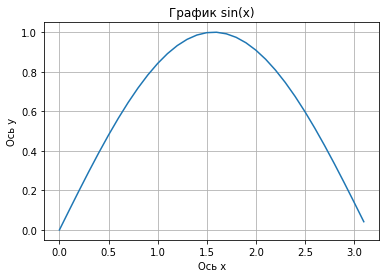

In [16]:
step = 0.1
x = np.arange(0, np.pi, step)
y = np.sin(x)

fig = plt.figure()
plt.plot(x, y)
plt.grid()

plt.title('График sin(x)')
plt.ylabel('Ось y')
plt.xlabel('Ось x');

Нарисовать график sin(x) и cos(x) на одном subplot'е и на разных, задать цвета, которые больше нравятся

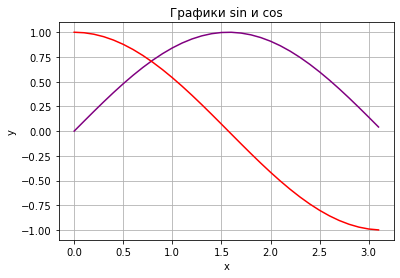

In [17]:
fig_1 = plt.figure()
plt.plot(x, y, 'purple', x, np.cos(x), 'red')
plt.grid()
plt.title('Графики sin и cos')
plt.xlabel('x')
plt.ylabel('y')
plt.show();

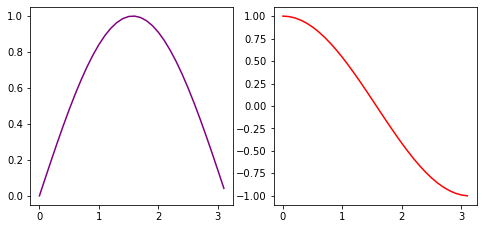

In [18]:
plt.figure(figsize = (8, 8))

plt.subplot(2, 2, 1)
plt.plot(x, y, 'purple');

plt.subplot(2, 2, 2)
plt.plot(x, np.cos(x), 'red');